In [1]:
import numpy                       
import matplotlib.pyplot as pyplot  
import math
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
from scipy.linalg import solve

In [2]:
c = 100.0
L = 1.0
alpha = 2e-2
x = numpy.linspace(0,1,11)
nx = 11
nt = 101
dx = L/(nx-1)
dt = 0.1
r = (alpha*dt)/(dx**2)

In [3]:
T_i = c*numpy.sin(3.14*x/L)
T_exact = numpy.zeros((nt, len(x)))
T_exact[0,:] = T_i.copy()

In [4]:
#Exact solution
for t in range(1,nt):
    T_exact[t,:] = numpy.sin(3.14*x/L)*numpy.exp((-alpha*(3.14)**2*(t/10.))/L**2)*c

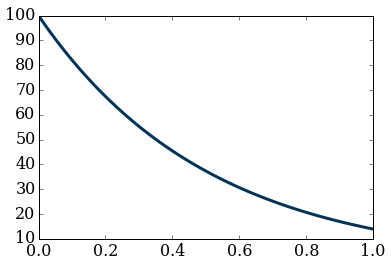

In [5]:
pyplot.plot(numpy.linspace(0,1,nt), T_exact[:nt,5], color='#003355', ls='-', lw=3)

In [6]:
# Simple Explicit Method
T_exp = c*numpy.sin(3.14*x/L)
T_nexp = numpy.zeros((nt,len(T_exp))) 
T_nexp[0,:] = T_exp.copy()

for t in range(1,nt):
    T_nexp[t,1:-1] = T_exp[1:-1] + r*(T_exp[2:]-2*T_exp[1:-1]+T_exp[:-2])
    T_nexp[t,0] = T_exp[0]
    T_nexp[t,-1] = T_exp[-1]
    T_exp = T_nexp[t].copy()

(0, 100)

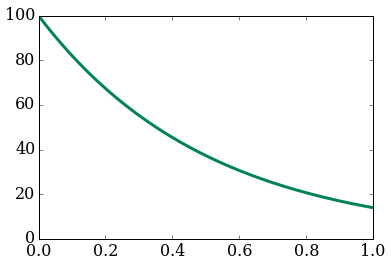

In [7]:
pyplot.plot(numpy.linspace(0,1,nt), T_nexp[:nt,5], color='#018355', ls='-', lw=3)
pyplot.ylim(0,100)

In [8]:
""" This is not the end! Work on it in future!!! P.S. : The problem is: This ADE is not unconditionally stable.
    While I calculate with nt = 101, something not nice happens. It work fine with nt = 11. I have to fix it.
"""
nt = 101
#Barakat and Clark ADE

T_r = c*numpy.sin(3.14*x/L)                  # initial conditions
T_l = T_r[::-1].copy()                              # iyileştir x[::-1]
#P_n = numpy.zeros((nt,len(T_r)))
P_n = T_r.copy()
#P_n[:,0] = 0
#Q_n = numpy.zeros((nt,len(T_l)))
Q_n = T_l.copy()
#Q_n[:,0] = 0
T_ade = numpy.zeros((nt,len(T_l)))
T_ade[:,:] = T_r.copy()


for t in range(1,nt):
    
   
    P_n[1:-1] = ((P_n[:-2] * r) + (T_r[2:] * r) + (T_l[1:-1] * (1-r))) / (1 + r)
    T_r = P_n.copy()
    
       
    Q_n[1:-1] = (T_l[1:-1]*(1-r)/(1+r)) + (Q_n[:-2] + T_l[2:])*(r/(1+r))
    T_l = Q_n.copy()
    
    
    T_ade[t,:] = (Q_n[::-1] + P_n)/2

(0, 100)

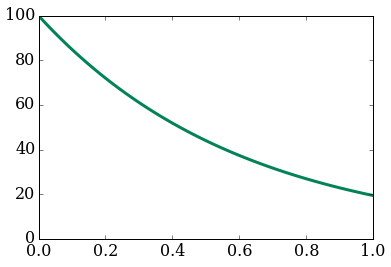

In [9]:
pyplot.plot(numpy.linspace(0,1,nt), T_ade[:nt,5], color='#018355', ls='-', lw=3)
pyplot.ylim(0,100)


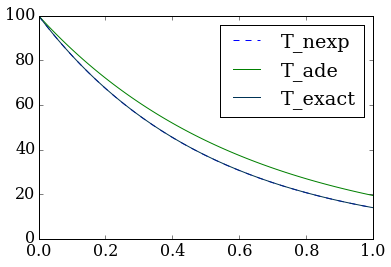

In [10]:
pyplot.plot(numpy.linspace(0,1,nt), T_nexp[:nt,5],ls='--')
pyplot.plot(numpy.linspace(0,1,nt), T_ade[:nt,5])
pyplot.plot(numpy.linspace(0,1,nt), T_exact[:nt,5], color='#003355', ls='-')

pyplot.ylim(0,100)
pyplot.legend(['T_nexp', 'T_ade', 'T_exact'], loc='upper right')

In [11]:
def Matrix(N, R):
    
    d = 2*numpy.diag(numpy.ones(N-2)*(1+1./r))
    ud = numpy.diag(numpy.ones(N-3)*-1,1)
    ld = numpy.diag(numpy.ones(N-3)*-1,-1)
    
    A = d+ud+ld
    
    return A

In [12]:
def generateRHS(T, R):
    
    h = numpy.zeros_like(T)
    
    h = T[2:] + (((1./r)-1) * T[1:-1]*2) + T[:-2]
    h[0] += T[0]
    
    return h

In [13]:
def CrankNicolson(T, A, nt, R):
    
    T_x = numpy.zeros((nt,len(T)))
    T_x[:,:]= T.copy()
    for t in range(1,nt):
        Tn = T.copy()
        h = generateRHS(Tn, r)
        T_interior = solve(A,h)
        T[1:-1] = T_interior.copy()
        
        T_x[t,:] = T.copy()
    
    return T_x

(0, 100)

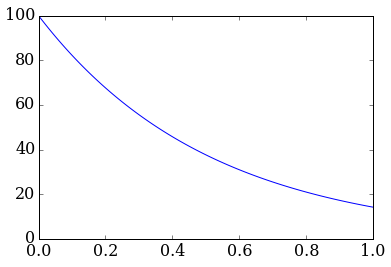

In [14]:
A_crni = Matrix(nx,r)
T_ini = c*numpy.sin(3.14*x/L)
T_crni = CrankNicolson(T_ini, A_crni, nt,r)

pyplot.plot(numpy.linspace(0,1,nt), T_crni[:nt,5])
pyplot.ylim(0,100)

In [15]:
def MatrixSIC(N, R):
    
    d = numpy.diag(numpy.ones(N-2)*(2+1./R))
    ud = numpy.diag(numpy.ones(N-3)*-1,1)
    ld = numpy.diag(numpy.ones(N-3)*-1,-1)
    
    A = d + ud + ld
    
    return A

In [16]:
def implicitRHS(T, R):
    
    h = numpy.empty_like(T)
    
    h = (1./R)*T[1:-1]
    h[0] += T[0]
    
    return h

In [17]:
def simpleimplicit(T, R, A, nt):
    
    T_h = numpy.zeros((nt,len(T)))
    T_h[:,:]= T.copy()
    
    
    for t in range(1,nt):
        Tn = T.copy()
        h = implicitRHS(Tn, R)
        Tinterior = solve(A, h)
        T[1:-1] = Tinterior.copy()
        
        T_h[t,:] = T.copy()
        
    return T_h    

In [18]:
A = MatrixSIC(nx, r)

In [19]:
Tini = c*numpy.sin(3.14*x/L)
T_h = simpleimplicit(Tini,r,A,nt)

(0, 100)

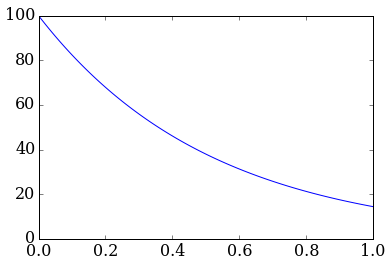

In [20]:
pyplot.plot(numpy.linspace(0,1,nt), T_h[:nt,5])
pyplot.ylim(0,100)